In [29]:
#import necessary modules

import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#download iris dataset 

iris_data = datasets.load_iris()

In [3]:
#Extract the dataset in array

df_array = iris_data.data

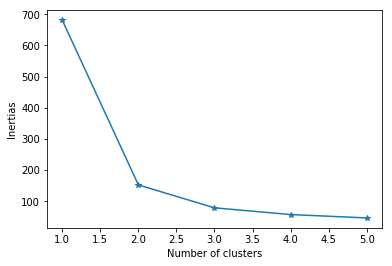

In [20]:
#K-Means Clustering: choosing number of clusters

kranges = range(1, 6)
inertias = []

for k in kranges:
    
    #instantiate KMeans
    model = KMeans(n_clusters=k)
    
    #fit the model
    model.fit(df_array)
    
    inertias.append(model.inertia_)
    
#Create a plot of inertia for different number of clusters

plt.plot(kranges, inertias, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

The above plot shows that after 3 (number of clusters) the inertia decrease very slowly. So, the ideal number of clusters for this dataset could be 3. Further checking the performance of model using 3 clusters.

In [53]:
#set the model using number of clusters as 3

model = KMeans(n_clusters = 3)
labels = model.fit_predict(df_array)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

#create a dataframe for predicted and true labels
df = pd.DataFrame({'labels':labels, 'varieties':df.species})


#create crosstab to check model performance
ctab = pd.crosstab(df['labels'], df['varieties'])

In [54]:
print(ctab)

varieties  setosa  versicolor  virginica
labels                                  
0               0          48         14
1              50           0          0
2               0           2         36


Overall the model was doing perfect in predicting two varities